In [5]:
! kaggle datasets download -d pkdarabi/cardetection
! unzip cardetection.zip

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import os
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
Final_model = YOLO('yolov8n.pt')

In [8]:
Result_Final_model = Final_model.train(data="/content/car/data.yaml",epochs = 20, batch = -1, optimizer = 'auto')

In [4]:
def return_boxes(model, path):
  boxes = model.predict(source=path)[0].boxes
  if len(boxes) == 0:
    return None
  x_min, y_min, x_max, y_max = boxes.xyxy[0]
  x_min = float(x_min)
  y_min = float(y_min)
  x_max = float(x_max)
  y_max = float(y_max)
  return x_min, y_min, x_max, y_max

def plot_bounding_box(path, x_min, y_min, x_max, y_max):
  plt.imshow(plt.imread(path))
  plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], '-g')
  plt.show()

In [5]:
model_box = YOLO('best.pt')


image 1/1 /home/hesam/projects/traffic-backend/backend/backend/car/test/images/00000_00000_00006_png.rf.9d1ea68507aff6973a1dbcdc6f4422a8.jpg: 640x640 1 Speed Limit 20, 6.1ms
Speed: 6.1ms preprocess, 6.1ms inference, 155.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/hesam/projects/traffic-backend/backend/backend/car/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg: 640x640 1 Speed Limit 30, 6.3ms
Speed: 3.5ms preprocess, 6.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/hesam/projects/traffic-backend/backend/backend/car/test/images/00000_00003_00005_png.rf.91e4d86cd4241911356889c94ae3f5ee.jpg: 640x640 1 Speed Limit 20, 6.1ms
Speed: 2.0ms preprocess, 6.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/hesam/projects/traffic-backend/backend/backend/car/test/images/000204_jpg.rf.0ea9da72e384254681f268a305a35eb6.jpg: 640x640 1 Speed Limit 40, 5.8ms
Speed: 2.4ms preprocess, 5.8ms i

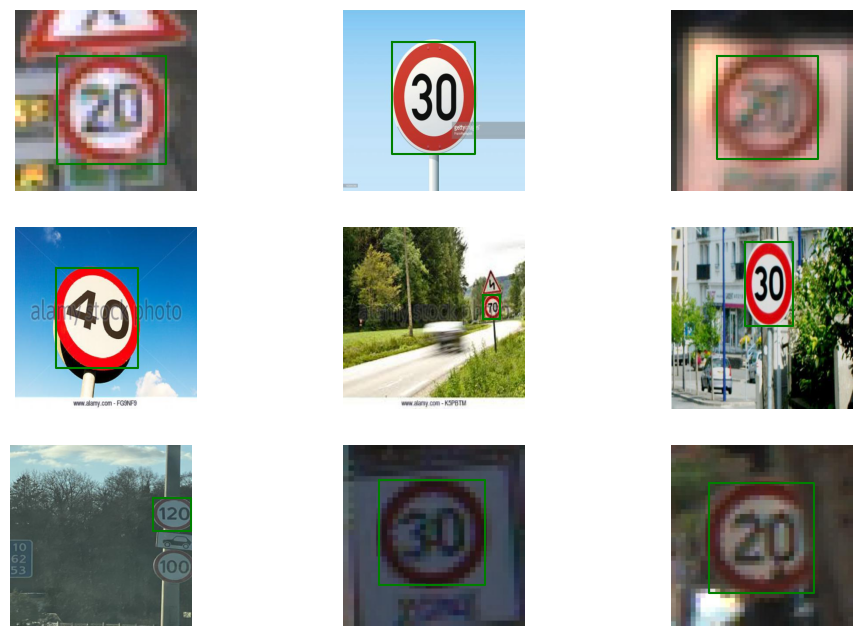

In [6]:
test_images_path = "car/test/images"

image_files = [f for f in os.listdir(test_images_path) if f.endswith((".jpg", ".png"))]

selected_images = random.sample(image_files, 9)

plt.figure(figsize=(12, 8))

for image_file in selected_images:
    image_path = os.path.join(test_images_path, image_file)
    x_min, y_min, x_max, y_max = return_boxes(model_box, image_path)
    plt.subplot(3, 3, selected_images.index(image_file) + 1)
    plt.imshow(plt.imread(image_path))
    plt.plot(
        [x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-g"
    )
    plt.axis("off")
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D


In [8]:
datas = {"train_data" :[], "train_labels" : [], "test_data" : [], "test_labels" : [], "valid_data" : [], "valid_labels" : []}
labels = {}
boxes = {"train_data" :[], "train_labels" : [], "test_data" : [], "test_labels" : [], "valid_data" : [], "valid_labels" : []}
classes =  ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']
data_types = ['train', 'test', 'valid']
cur_path = os.getcwd()

for types in data_types:
    train_images_path = os.path.join("car", types, 'images')
    train_labels_path = os.path.join('car', types, 'labels')
    images = os.listdir(train_images_path)
    labels = os.listdir(train_labels_path)
    images.sort()
    labels.sort()
    for label in labels:
        label_path = os.path.join(train_labels_path, label)
        with open(label_path, 'r') as file:
            output = file.read()
            if output == "":
                splited_text[0] = 14
            else :
                splited_text = output.split(" ")
            datas[f"{types}_labels"].append(int(splited_text[0]))
    for i,a in enumerate(images):
        image = Image.open(train_images_path + '/'+ a)
        boxes = return_boxes(model_box, train_images_path + '/' + a)
        if boxes != None:
            image = image.crop(boxes)
        image = image.resize((100, 100))
        image = np.array(image)
        datas[f"{types}_data"].append(image)



image 1/1 /home/hesam/projects/traffic-backend/backend/backend/car/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg: 640x640 1 Speed Limit 30, 9.6ms
Speed: 4.4ms preprocess, 9.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/hesam/projects/traffic-backend/backend/backend/car/train/images/000005_jpg.rf.d730849ae93a7c211a7c8f57ed851028.jpg: 640x640 1 Speed Limit 30, 6.4ms
Speed: 2.5ms preprocess, 6.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/hesam/projects/traffic-backend/backend/backend/car/train/images/000007_jpg.rf.226fe0751cf8ba445b8f87970e70f606.jpg: 640x640 1 Speed Limit 30, 5.9ms
Speed: 1.9ms preprocess, 5.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/hesam/projects/traffic-backend/backend/backend/car/train/images/000008_jpg.rf.bd6ae6db0f8c0eb727706bc322ce21ae.jpg: 640x640 1 Speed Limit 30, 12.8ms
Speed: 2.1ms preprocess, 12.8ms inference, 2.9ms po

In [9]:
for key in datas.keys():
    datas[key] = np.array(datas[key])
train_label = to_categorical(datas['train_labels'], len(classes))
test_label = to_categorical(datas['test_labels'], len(classes))
valid_label = to_categorical(datas['valid_labels'], len(classes))

(2824, 100, 100, 3) (706, 100, 100, 3) (2824,) (706,)


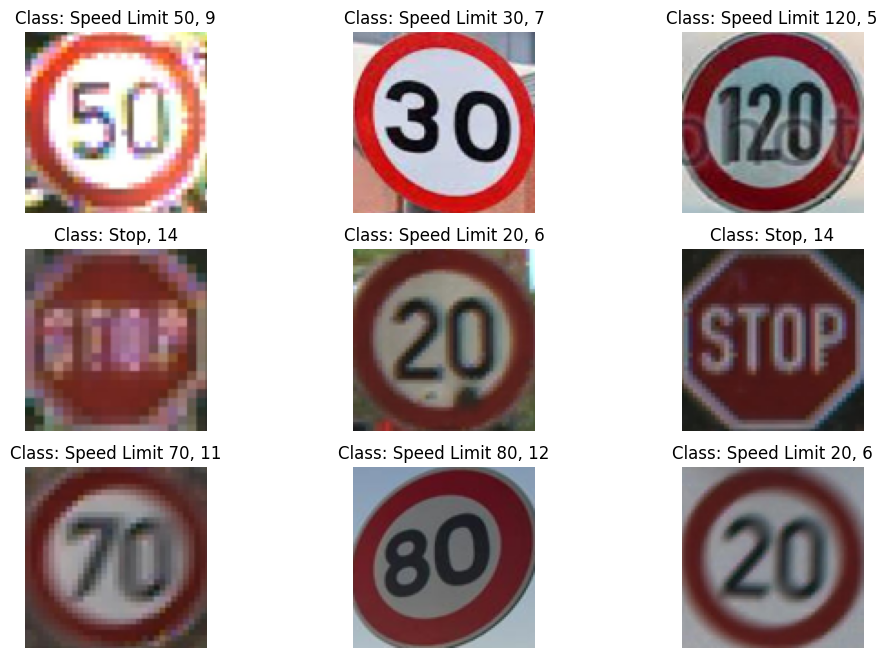

In [30]:
indices = random.sample(range(len(datas["train_data"])), 9)

plt.figure(figsize=(12, 8))
for i, index in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(datas["train_data"][index])
    plt.title(
        f"Class: {classes[datas['train_labels'][index]]}, {datas['train_labels'][index]}"
    )
    plt.axis("off")
plt.show()

In [19]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding="same", input_shape=datas["train_data"].shape[1:]))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(rate=0.5)) 
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 50, 50, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        9

In [20]:
eps = 60
initial_lr = 0.001
def lr_schedule(epoch):
    final_lr = 0.0001
    lr = initial_lr - (epoch * (initial_lr - final_lr) / (eps - 1))
    return lr

img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.1,
    shear_range=0.2
)

train_ds = img_gen.flow(datas['train_data'], train_label, batch_size=32)

opt = tf.keras.optimizers.Adam(learning_rate=initial_lr)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

anc = model.fit(
    train_ds,
    epochs=eps,
    validation_data=(datas['valid_data'], valid_label),
    callbacks=[lr_scheduler]
)


Epoch 1/60
111/111 [==============================] - 19s 159ms/step - loss: 2.4263 - accuracy: 0.2204 - val_loss: 2.4067 - val_accuracy: 0.1910 - lr: 0.0010
Epoch 2/60
111/111 [==============================] - 17s 155ms/step - loss: 2.1227 - accuracy: 0.3068 - val_loss: 2.2521 - val_accuracy: 0.3071 - lr: 9.8475e-04
Epoch 3/60
111/111 [==============================] - 17s 155ms/step - loss: 1.9934 - accuracy: 0.3312 - val_loss: 2.1931 - val_accuracy: 0.2871 - lr: 9.6949e-04
Epoch 4/60
111/111 [==============================] - 17s 156ms/step - loss: 1.8864 - accuracy: 0.3572 - val_loss: 2.2288 - val_accuracy: 0.2859 - lr: 9.5424e-04
Epoch 5/60
111/111 [==============================] - 17s 155ms/step - loss: 1.7432 - accuracy: 0.4278 - val_loss: 1.7843 - val_accuracy: 0.4345 - lr: 9.3898e-04
Epoch 6/60
111/111 [==============================] - 18s 158ms/step - loss: 1.4965 - accuracy: 0.5108 - val_loss: 1.4586 - val_accuracy: 0.5256 - lr: 9.2373e-04
Epoch 7/60
111/111 [============

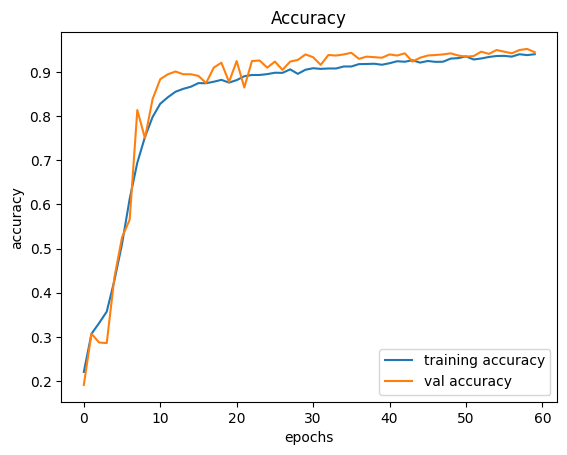

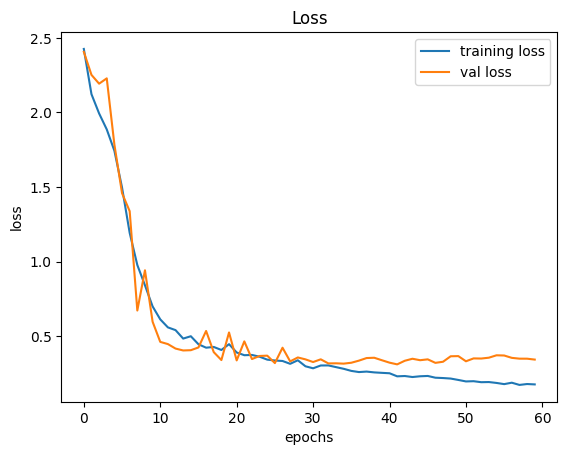

In [21]:
plt.figure(0)
plt.plot(anc.history['accuracy'], label='training accuracy')
plt.plot(anc.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(anc.history['loss'], label='training loss')
plt.plot(anc.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [51]:
test_loss, test_acc = model.evaluate(datas['test_data'], test_label)
print('Test Accuracy:', test_acc)

20/20 [==============================] - 1s 35ms/step - loss: 0.6988 - accuracy: 0.9201
Test Accuracy: 0.9200627207756042



image 1/1 c:\Users\ToosArax\Desktop\MV-Project\image.png: 640x480 1 Stop, 47.3ms
Speed: 1.5ms preprocess, 47.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\ToosArax\Desktop\MV-Project\image.png: 640x480 1 Stop, 43.5ms
Speed: 1.5ms preprocess, 43.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\ToosArax\Desktop\MV-Project\image.png: 640x480 1 Stop, 43.9ms
Speed: 1.5ms preprocess, 43.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\ToosArax\Desktop\MV-Project\image.png: 640x480 1 Stop, 42.2ms
Speed: 1.5ms preprocess, 42.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\ToosArax\Desktop\MV-Project\image.png: 640x480 1 Stop, 42.8ms
Speed: 2.0ms preprocess, 42.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)

image 1/1 c:\Users\ToosArax\Desktop\MV-Project\image.png: 640x480 1 Stop, 43.8ms
Speed: 1.5ms preprocess

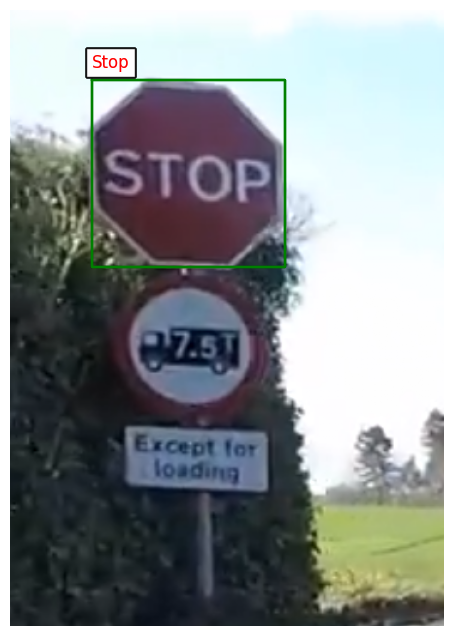

In [79]:
def preprocess_image(image):
    image = np.array(image)
    if image.shape[-1] == 4:
        image = image[:, :, :3]
    image = np.expand_dims(image, axis=0)
    return image


plt.figure(figsize=(12, 8))
for image_file in selected_images:
    image_path = "image.png"
    x_min, y_min, x_max, y_max = return_boxes(model_box, image_path)
    plt.imshow(plt.imread(image_path))
    plt.plot(
        [x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], "-g"
    )
    image = Image.open(image_path)
    image = image.crop((x_min, y_min, x_max, y_max))
    image = image.resize(
        (100, 100)
    ) 

    preprocessed_image = preprocess_image(image)
    class_label = classes[np.argmax(model(preprocessed_image))]
    plt.text(
        x_min,
        y_min - 10,
        class_label,
        color="red",
        fontsize=12,
        bbox=dict(facecolor="white", alpha=0.8),
    )
    plt.axis("off")
plt.show()

In [ ]:
model.save('classification.h5')